In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

2024-03-07 12:28:16.048495: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 12:28:16.272342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 12:28:16.272388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 12:28:16.310446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 12:28:16.377925: I tensorflow/core/platform/cpu_feature_guar

READ DATA

In [ ]:
(train_data, test_data), cifar100_info = tfds.load('cifar100', split=["train", "test"], with_info=True)

In [ ]:
train_data = train_data.concatenate(test_data)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'label_column' is the column containing the labels
# Assuming you want to keep rows with labels 'label1' and 'label2'

# Step 1: Filter to retain specific labels
specific_labels = ['label1', 'label2']
filtered_df = df[df['label_column'].isin(specific_labels)]

# Step 2: Sample 50% of the remaining dataset
sampled_df = filtered_df.sample(frac=0.5, random_state=42)  # You can adjust the random state for reproducibility

# Step 3: Drop sampled rows from the original dataset
final_df = df.drop(sampled_df.index)

# final_df now contains 50% of the original dataset while retaining rows with specific labels




In [ ]:
dataset = []
for data in tfds.as_numpy(train_data):
  dataset.append({
      'image' : data['image'],
      'label' : int(data['label'])
  })

In [2]:
import pickle

In [ ]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [ ]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [ ]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=100))

X = np.array(X)
Y = np.array(Y)

In [ ]:
with open('datax.pkl','wb') as f:
    pickle.dump(X, f)



In [ ]:
with open('datay.pkl','wb') as f:
    pickle.dump(Y, f)

In [4]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
with open('x_train.pkl','wb') as f:
    pickle.dump(Xtrain, f)

with open('y_train.pkl','wb') as f:
    pickle.dump(Ytrain, f)

with open('x_test.pkl','wb') as f:
    pickle.dump(Xtest, f)

with open('y_test.pkl','wb') as f:
    pickle.dump(Ytest, f)

In [3]:
with open('x_train.pkl','rb') as f:
    Xtrain = pickle.load(f)
with open('y_train.pkl','rb') as f:
    Ytrain = pickle.load(f)

with open('x_test.pkl','rb') as f:
    Xtest = pickle.load(f)
with open('y_test.pkl','rb') as f:
    Ytest = pickle.load(f)

Data Plotting

In [4]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [8]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(32,32,3)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(100, activation='softmax')
    ]
)

model.summary()

2024-03-07 12:18:34.559039: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:18:34.853876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:18:34.853936: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:18:34.869604: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:18:34.869677: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

In [9]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [10]:
history_alexnet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10


2024-03-07 12:18:52.495569: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-07 12:18:52.703777: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-07 12:18:53.270224: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-07 12:18:53.813639: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb4f02fb420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-07 12:18:53.813687: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-07 12:18:53.831731: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709788733.966954   17524 devic

3000/3000 [==============================] - 45s 14ms/step - loss: 4.6066 - accuracy: 0.0098 - val_loss: 4.6066 - val_accuracy: 0.0098
Epoch 2/10
3000/3000 [==============================] - 43s 14ms/step - loss: 4.6061 - accuracy: 0.0093 - val_loss: 4.6069 - val_accuracy: 0.0082
Epoch 3/10
3000/3000 [==============================] - 45s 15ms/step - loss: 4.6060 - accuracy: 0.0092 - val_loss: 4.6070 - val_accuracy: 0.0080
Epoch 4/10
3000/3000 [==============================] - 46s 15ms/step - loss: 4.6060 - accuracy: 0.0101 - val_loss: 4.6070 - val_accuracy: 0.0084
Epoch 5/10
3000/3000 [==============================] - 46s 15ms/step - loss: 4.6060 - accuracy: 0.0101 - val_loss: 4.6071 - val_accuracy: 0.0080
Epoch 6/10
3000/3000 [==============================] - 46s 15ms/step - loss: 4.6060 - accuracy: 0.0096 - val_loss: 4.6071 - val_accuracy: 0.0088
Epoch 7/10
3000/3000 [==============================] - 47s 16ms/step - loss: 4.6060 - accuracy: 0.0091 - val_loss: 4.6070 - val_accura

In [11]:
with open('history_alexnet.pkl', 'wb') as f:
    pickle.dump(history_alexnet, f)

In [ ]:
with open('history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

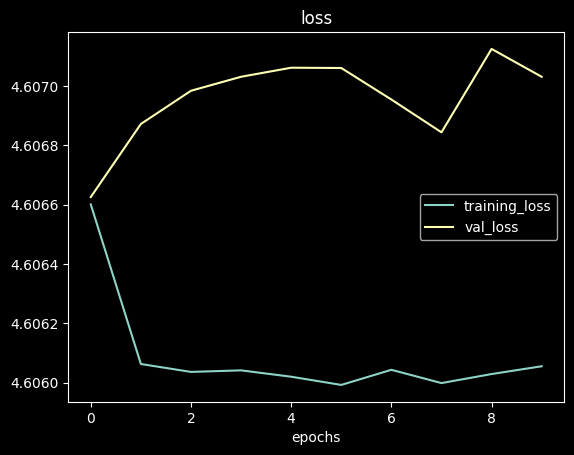

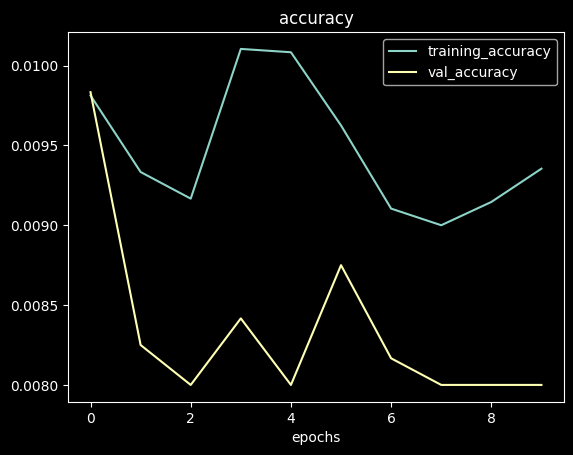

In [12]:
plot_loss_curves(history_alexnet)

LENET

In [5]:
model = keras.models.Sequential(
    [
      keras.layers.Input((32,32,3)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(100, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

2024-03-07 12:28:36.505783: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:28:36.624954: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:28:36.625033: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:28:36.628230: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-07 12:28:36.628286: I external/local_xla/xla/stream_executor

In [6]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [7]:
history_lenet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10


2024-03-07 12:28:43.780487: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-07 12:28:43.986147: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-07 12:28:44.554320: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-07 12:28:44.911786: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fba6690d130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-07 12:28:44.911824: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-07 12:28:44.924837: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709789325.021984   22522 devic

3000/3000 [==============================] - 24s 7ms/step - loss: 4.6104 - accuracy: 0.0096 - val_loss: 4.6070 - val_accuracy: 0.0080
Epoch 2/10
3000/3000 [==============================] - 21s 7ms/step - loss: 4.6063 - accuracy: 0.0098 - val_loss: 4.6067 - val_accuracy: 0.0087
Epoch 3/10
3000/3000 [==============================] - 22s 7ms/step - loss: 4.5666 - accuracy: 0.0128 - val_loss: 4.3294 - val_accuracy: 0.0284
Epoch 4/10
3000/3000 [==============================] - 23s 8ms/step - loss: 4.1556 - accuracy: 0.0533 - val_loss: 4.0178 - val_accuracy: 0.0735
Epoch 5/10
3000/3000 [==============================] - 22s 7ms/step - loss: 3.9266 - accuracy: 0.0902 - val_loss: 3.8559 - val_accuracy: 0.1027
Epoch 6/10
3000/3000 [==============================] - 22s 7ms/step - loss: 3.7746 - accuracy: 0.1142 - val_loss: 3.7218 - val_accuracy: 0.1242
Epoch 7/10
3000/3000 [==============================] - 22s 7ms/step - loss: 3.6578 - accuracy: 0.1354 - val_loss: 3.6293 - val_accuracy: 0.1

In [8]:
with open('history_lenet.pkl', 'wb') as f:
    pickle.dump(history_lenet, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

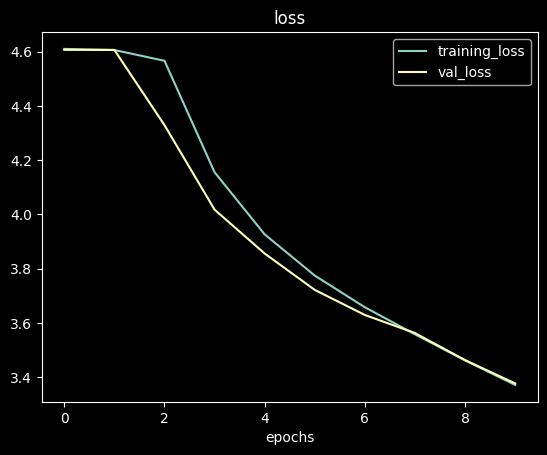

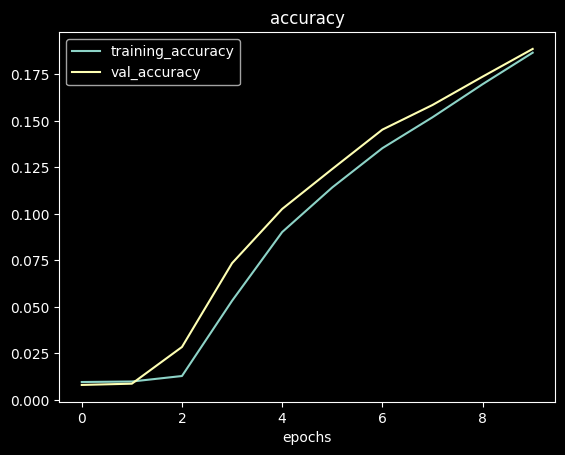

In [9]:
plot_loss_curves(history_lenet)

CUSTOM MODEL

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),

      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.Conv2D(12, kernel_size=(5,5), activation='sigmoid', padding='same'),

      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid', padding='same'),
      keras.layers.Conv2D(32, kernel_size=(3,3), activation='sigmoid', padding='same'),
      keras.layers.Conv2D(32, kernel_size=(3,3), activation='sigmoid', padding='same'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),

      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(84, activation='sigmoid'),

      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_custom = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

In [ ]:
with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history_custom, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_custom = pickle.load(f)

In [ ]:
plot_loss_curves(history_custom)